<a href="https://colab.research.google.com/github/fjadidi2001/Artificial_Intelligence_Learning/blob/master/RBFN_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import numpy as np # For numerical operations and array handling
import matplotlib.pyplot as plt # To create insightful plots.
from sklearn.datasets import make_classification # To generate a sample dataset, perform train-test splits, and evaluate our RBFN model.
from sklearn.model_selection import train_test_split # To standardize our dataset.
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist # For calculating pairwise distances between data points.
import pandas as pd


<bound method NDFrame.head of     Unnamed: 0  Unnamed: 1  Unnamed: 2
0       0.1430      0.0443           1
1       0.2480      0.1690           1
2       0.2800      0.3520           1
3       0.2170      0.5590           1
4       0.0531      0.7480           1
..         ...         ...         ...
95     -2.2800     -6.5100          -1
96     -0.2620     -7.0500          -1
97      1.8700     -6.9500          -1
98      3.9200     -6.2200          -1
99      5.7000     -4.8800          -1

[100 rows x 3 columns]>
         Unnamed: 0    Unnamed: 1  Unnamed: 2
count  1.000000e+02  1.000000e+02  100.000000
mean  -8.881784e-18  1.776357e-17    0.000000
std    2.983816e+00  3.257511e+00    1.005038
min   -6.300000e+00 -7.050000e+00   -1.000000
25%   -1.947500e+00 -2.095000e+00   -1.000000
50%    0.000000e+00  0.000000e+00    0.000000
75%    1.947500e+00  2.095000e+00    1.000000
max    6.300000e+00  7.050000e+00    1.000000


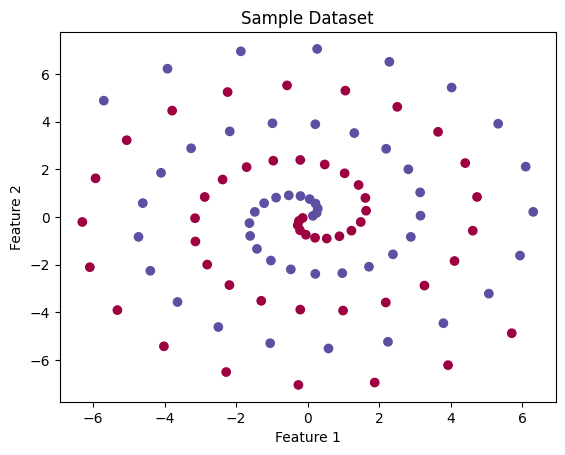

In [59]:
# Load the dataset
data = pd.read_csv('spiral_100.csv')
print(data.head)
print(data.describe())
# Assuming the column names are 'Unnamed: 0', 'Unnamed: 1', and 'Unnamed: 2'
X = data[['Unnamed: 0', 'Unnamed: 1']]  # Features
y = data['Unnamed: 2']  # Labels

# Plot the data
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=plt.cm.Spectral)
plt.title("Sample Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

<bound method NDFrame.head of      Unnamed: 0  Unnamed: 1  Unnamed: 2
0         0.143      0.0443           1
1         0.219      0.1200           1
2         0.268      0.2250           1
3         0.280      0.3520           1
4         0.249      0.4900           1
..          ...         ...         ...
145       1.160     -7.0600          -1
146       2.570     -6.7800          -1
147       3.920     -6.2200          -1
148       5.150     -5.3900          -1
149       6.200     -4.3100          -1

[150 rows x 3 columns]>
         Unnamed: 0    Unnamed: 1  Unnamed: 2
count  1.500000e+02  1.500000e+02   150.00000
mean  -7.105427e-17  2.368476e-17     0.00000
std    3.004302e+00  3.258796e+00     1.00335
min   -6.290000e+00 -7.060000e+00    -1.00000
25%   -1.765000e+00 -2.177500e+00    -1.00000
50%    0.000000e+00  0.000000e+00     0.00000
75%    1.765000e+00  2.177500e+00     1.00000
max    6.290000e+00  7.060000e+00     1.00000


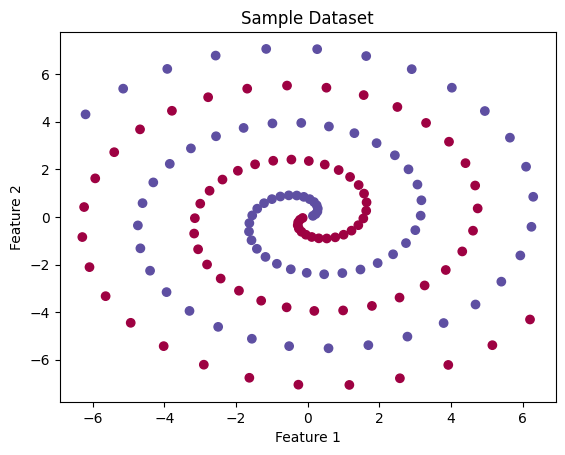

In [58]:
# Load the dataset
data2 = pd.read_csv('spiral_150.csv')
print(data2.head)
print(data2.describe())
# Assuming the column names are 'Unnamed: 0', 'Unnamed: 1', and 'Unnamed: 2'
X2 = data2[['Unnamed: 0', 'Unnamed: 1']]  # Features
y2 = data2['Unnamed: 2']  # Labels

# Plot the data
plt.scatter(X2.iloc[:, 0], X2.iloc[:, 1], c=y2, cmap=plt.cm.Spectral)
plt.title("Sample Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

<bound method NDFrame.head of      Unnamed: 0  Unnamed: 1  Unnamed: 2
0         0.143      0.0443           1
1         0.203      0.0979           1
2         0.248      0.1690           1
3         0.274      0.2560           1
4         0.280      0.3520           1
..          ...         ...         ...
195       2.920     -6.6600          -1
196       3.920     -6.2200          -1
197       4.860     -5.6200          -1
198       5.700     -4.8800          -1
199       6.430     -4.0100          -1

[200 rows x 3 columns]>
         Unnamed: 0  Unnamed: 1  Unnamed: 2
count  2.000000e+02  200.000000  200.000000
mean  -3.552714e-17    0.000000    0.000000
std    3.014525e+00    3.258476    1.002509
min   -6.430000e+00   -7.080000   -1.000000
25%   -1.817500e+00   -2.132500   -1.000000
50%    0.000000e+00    0.000000    0.000000
75%    1.817500e+00    2.132500    1.000000
max    6.430000e+00    7.080000    1.000000


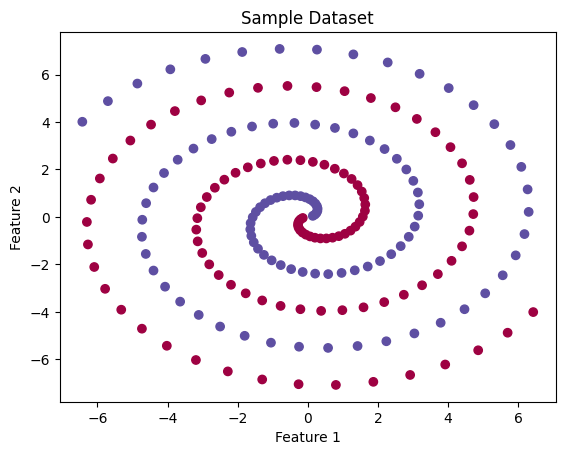

In [57]:
# Load the dataset
data3 = pd.read_csv('spiral_200.csv')
print(data3.head)
print(data3.describe())
# Assuming the column names are 'Unnamed: 0', 'Unnamed: 1', and 'Unnamed: 2'
X3 = data3[['Unnamed: 0', 'Unnamed: 1']]  # Features
y3 = data3['Unnamed: 2']  # Labels

# Plot the data
plt.scatter(X3.iloc[:, 0], X3.iloc[:, 1], c=y3, cmap=plt.cm.Spectral)
plt.title("Sample Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

<bound method NDFrame.head of      Unnamed: 0  Unnamed: 1  Unnamed: 2
0         0.184      0.0779           1
1         0.232      0.1390           1
2         0.264      0.2140           1
3         0.280      0.3000           1
4         0.275      0.3930           1
..          ...         ...         ...
209       3.790     -6.2800          -1
210       4.680     -5.7500          -1
211       5.480     -5.0900          -1
212       6.200     -4.3100          -1
213       6.800     -3.4400          -1

[214 rows x 3 columns]>


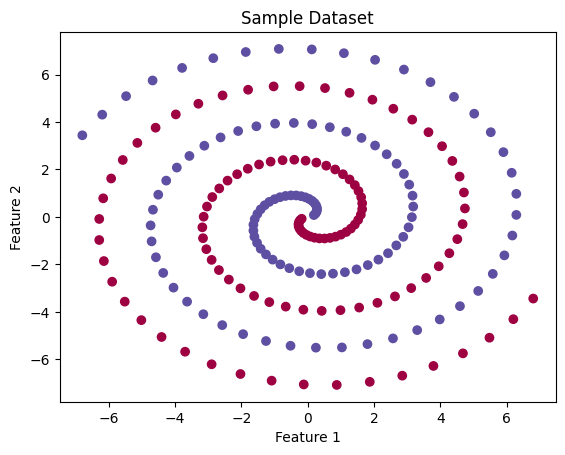

In [44]:
# Load the dataset
datag = pd.read_csv('spiral_g.csv')
print(datag.head)
# Assuming the column names are 'Unnamed: 0', 'Unnamed: 1', and 'Unnamed: 2'
Xg = datag[['Unnamed: 0', 'Unnamed: 1']]  # Features
yg = datag['Unnamed: 2']  # Labels

# Plot the data
plt.scatter(Xg.iloc[:, 0], Xg.iloc[:, 1], c=yg, cmap=plt.cm.Spectral)
plt.title("Sample Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [45]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X2 = scaler.fit_transform(X2)
X3 = scaler.fit_transform(X3)
Xg = scaler.fit_transform(Xg)

In [46]:
def gaussian_rbf(x, center, sigma):
    return np.exp(-cdist(x, center, 'sqeuclidean') / (2 * sigma**2))

In [47]:
n_centers = 10  # Number of RBF centers
center_indices = np.random.choice(X.shape[0], n_centers, replace=False)
rbf_centers = X[center_indices]
rbf_width = 1.0

In [48]:
n_centers = 10  # Number of RBF centers
center_indices = np.random.choice(X.shape[0], n_centers, replace=False)
rbf_centers = X2[center_indices]
rbf_width = 1.0

In [49]:
n_centers = 10  # Number of RBF centers
center_indices = np.random.choice(X.shape[0], n_centers, replace=False)
rbf_centers = X3[center_indices]
rbf_width = 1.0

In [50]:
def rbf_layer(X, rbf_centers, rbf_width):
    return gaussian_rbf(X, rbf_centers, rbf_width)

def rbfn_predict(X, rbf_centers, rbf_width, weights):
    rbf_outputs = rbf_layer(X, rbf_centers, rbf_width)
    return rbf_outputs @ weights

In [51]:
def rbf_layer(X2, rbf_centers, rbf_width):
    return gaussian_rbf(X2, rbf_centers, rbf_width)

def rbfn_predict(X2, rbf_centers, rbf_width, weights):
    rbf_outputs = rbf_layer(X2, rbf_centers, rbf_width)
    return rbf_outputs @ weights

In [54]:
def rbf_layer(X3, rbf_centers, rbf_width):
    return gaussian_rbf(X3, rbf_centers, rbf_width)

def rbfn_predict(X3, rbf_centers, rbf_width, weights):
    rbf_outputs = rbf_layer(X3, rbf_centers, rbf_width)
    return rbf_outputs @ weights

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Assuming you have three datasets for training (X, X2, X3) and one dataset for testing (X_test)
# Assuming you also have corresponding target variables for training (y, y2, y3) and testing (y_test)

# Concatenate the three training datasets
X_train = pd.concat([X, X2, X3])
y_train = pd.concat([y, y2, y3])

# Train the model using the concatenated training datasets
model = LinearRegression()
model.fit(X_train, y_train)

# Test the model using the testing dataset
predictions = model.predict(X_train)
print(predictions)
# Evaluate the model's performance
# You can use metrics such as mean squared error, r-squared, etc. to evaluate the model's performance


[ 0.0053189   0.01335568  0.02230393  0.03011346  0.03476425  0.03450844
  0.02825408  0.01572104 -0.00257599 -0.02499641 -0.04964864 -0.07325159
 -0.09316081 -0.10603251 -0.1096562  -0.10222835 -0.08330809 -0.05381713
 -0.01489235  0.02957192  0.07580155  0.11935907  0.15514369  0.17923809
  0.18807453  0.17925076  0.15316505  0.11009378  0.05309587 -0.01265055
 -0.08150672 -0.14777117 -0.20385993 -0.24486064 -0.26535001 -0.26202936
 -0.23391836 -0.18265069 -0.11155965 -0.02637747  0.06561652  0.15635417
  0.23653034  0.29926049  0.33708639  0.3449345   0.32209886  0.26792012
  0.18741524  0.08586289 -0.0053189  -0.01335568 -0.02230393 -0.03011346
 -0.03476425 -0.03450844 -0.02825408 -0.01572104  0.00257599  0.02499641
  0.04964864  0.07325159  0.09316081  0.10603251  0.1096562   0.10222835
  0.08330809  0.05381713  0.01489235 -0.02957192 -0.07580155 -0.11935907
 -0.15514369 -0.17923809 -0.18807453 -0.17925076 -0.15316505 -0.11009378
 -0.05309587  0.01265055  0.08150672  0.14777117  0